<a href="https://colab.research.google.com/github/hyemin3656/self_study_MLDL/blob/main/PredictWeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 농어 무게 예측 프로그램

# k 최근접 이웃 회귀
임의의 어떤 숫자를 예측.

ex) 내년도 경제 성장률, 배달의 도착할 시간

sol. 주위의 가장 가까운 샘플 k 개 선택, 이웃 샘플의 수치들의 평균을 예측 타깃값으로 설정


**데이터 준비**

56개의 길이 - 무게 샘플

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

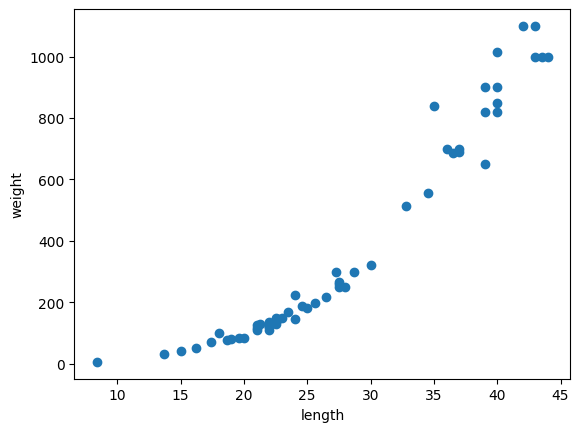

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

 **사이킷런 훈련 세트 조건 : 2차원 배열**

이 예제에서는 특성을 1개만 사용하므로 수동으로 2차원 배열 만들어야함.

sol. reshape() 함수를 이용해 2차원 배열로 변환하기

* 지정한 크기와 원본 배열의 원소의 개수가 다르면 에러 발생


In [5]:
test_array = np.array([1,2,3,4])
print(test_array.reshape(4,1))

[[1]
 [2]
 [3]
 [4]]


In [6]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [7]:
test_array = test_array.reshape(2,2)
print('size', test_array.shape)
print('test_array', test_array)

size (2, 2)
test_array [[1 2]
 [3 4]]


**넘파이의 배열 크기 저장 기능**

-1로 접근하면 나머지 원소 개수로 모두 채우라는 의미

* 배열 크기 몰라도 reshape 가능

In [8]:
train_input = train_input.reshape(-1, 1) # (42, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


**훈련**

In [9]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

# 회귀모델의 정확도 평가 방법

분류모델에선 전체 중 맞힌 개수로 정확도 평가.
회귀모델에선 수치로 접근해야 함

**1. 결정 계수**

R^2 = 1 - ((타깃 - 예측)^2 의 합 / (타깃 - 평균)^2) 의 합

* 타깃의 평균 정도 예측(잘 예측하지 못하는 경우) 한다면 R^2 은 0 에 가까워짐

* 타깃에 가깝게 예측(잘 예측)한다면 R^2 은 1에 가까워짐

In [10]:
print(knr.score(test_input, test_target)) # score 반환 값 높을수록 성능 좋음

0.992809406101064


**2. mean_absolute_error**
* sklearn.metrics 패키지의 측정도구
* 예측과 타깃의 절댓값 오차의 평균 반환
* 매개변수로 (타깃, 예측값) 전달

In [11]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

#평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)

print(mae)


19.157142857142862


# 과대적합 vs 과소적합

과대적합 : 훈련셋의 점수는 굉장히 높고 테스트셋의 점수는 굉장히 낮은 경우 -> 새로운 샘플에 대한 예측 어려움

과소적합 : 훈련셋보다 테스트셋의 점수가 높거나 두 점수 모두 매우 낮은 경우
- 원인 1. 모델이 너무 단순하여 훈련 셋에 적절히 훈련되지 않은 경우
> k 최근접 이웃 회귀의 경우 k 값 줄여서 훈련셋의 국지적인 패턴을 잘 반영하도록하기
- 원인 2. 데이터의 개수가 작아서 테스트셋이 훈련셋의 특징을 따르지 못하는 경우

In [12]:
# 훈련셋의 점수 확인
print(knr.score(train_input, train_target)) # 과소적합 96 << 99

0.9698823289099254


In [13]:
# 이웃 개수 5->3 으로 수정
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


**Q. k 값 변경하며 과소적합/과대적합 관찰**

* n 이 커짐에 따라 모델이 단순해짐

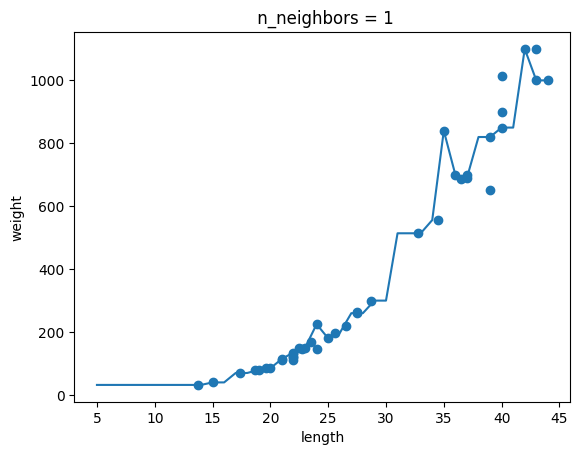

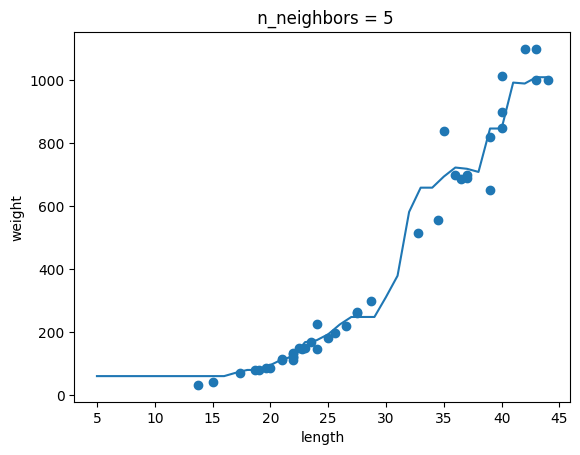

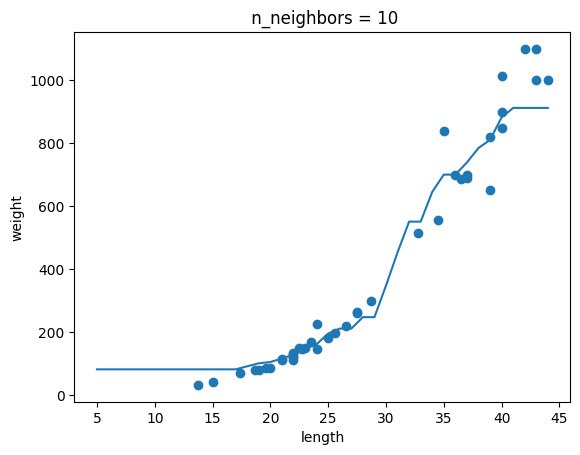

In [29]:
knr = KNeighborsRegressor()

# 5-45 까지 x좌표 생성
x = np.arange(5,45).reshape(-1,1) # sklearn 의 input 이므로 2차원 배열로

# k = 1, 5, 10 일 때 예측 결과를 그래프로 그리기
for i in [1,  5, 10]:
  knr.n_neighbors = i
  knr.fit(train_input, train_target)

  # 지정한 범위 x에 대한 예측 구하기
  prediction = knr.predict(x) #배열 전달 가능

  # 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title(' n_neighbors = {}'.format(i))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

**k 최근접 이웃 회귀 모델의 문제점**

 새로운 샘플이 훈련 셋의 범위를 벗어나면 범위 안에서 예측값을 구하여 실제 값과 크게 차이남

*  50cm 농어 예측값<<<실제값
* 50cm 농어와 100cm 농어의 예측값 동일
* 농어의 길이가 아무리 커져도 이웃들이 동일하므로 무게 예측값 일정한 문제

In [15]:
# k=3 인 최근접 이웃 모델
knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

#50cm 농어 예측값
print(knr.predict([[50]]))
#100cm 농어 예측값
print(knr.predict([[100]]))

[1033.33333333]
[1033.33333333]


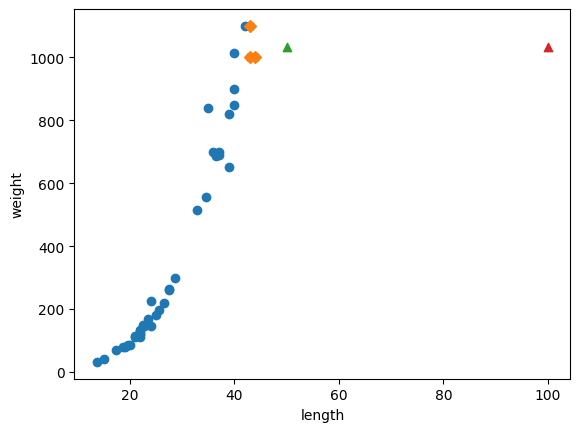

1033.3333333333333


In [16]:
# 50cm 농어의 최근접 이웃
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 1033, marker = '^') # 예측값 O, 실제값 X
plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#이웃들의 평균 (= 예측값)
print(np.mean(train_target[indexes]))

# 선형 회귀
특성을 가장 잘 나타낼 수 있는 하나의 직선을 찾는다.
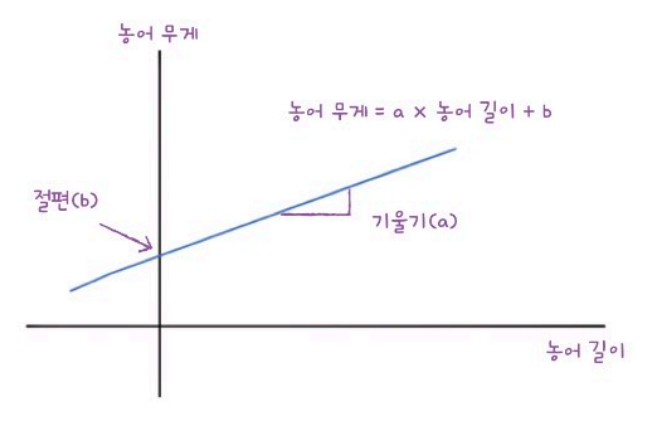
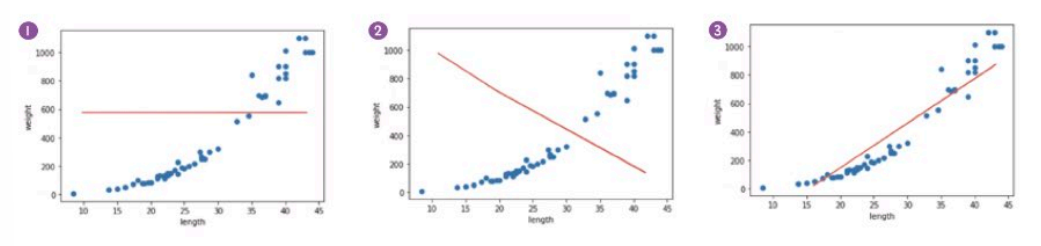

그래프 1: 농어 무게를 평균값 하나로 예측 -> R^2이 0에 가까움

그래프 2: 실제값과 반대로 예측 -> R^2 이 음수

그래프 3: 가장 잘 예측

**모델 훈련**

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target) #최적의 직선 찾기

print(lr.predict([[50]]))

[1241.83860323]


**모델 기반 학습 - LinearRegression 의 모델 파라미터**

y = a *x + b

기울기 a: coef_
절편 b: intercept_

* 모델 파라미터가 없는 학습 -> 사례 기반 학습

In [18]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


**plot()**
라인 플롯 그리는 함수

X축값과 Y값을 찍고 라인으로 연결

* 선 -> plot()
* 점 -> scatter()

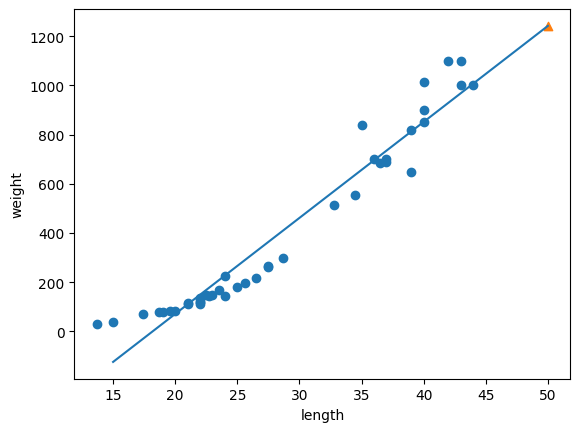

In [19]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
#과대적합 or 과소적합 검사
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


**선형 회귀의 문제점**

* 실제 데이터가 곡선형태를 띈다면 train, test 둘 다 정확도가 낮은 과소적합 발생

* 직선으로 예측하면 위 그래프처럼 무게를 음수로 예측 -> 곡선으로 예측하기

# 다항 회귀
데이터를 잘 반영하는 최적의 곡선 찾기
* 길이를 제곱한 항을 훈련 셋에 추가

Q. 2차 이상의 방정식도 선형 회귀인가?
> x^2 값을 새로운 특성 z로 치환하면 x^2 과 x를 서로 다른 두개의 특성으로 인식하고 1차 다항식으로 취급하므로 선형모델로 다항식 회귀분석 가능
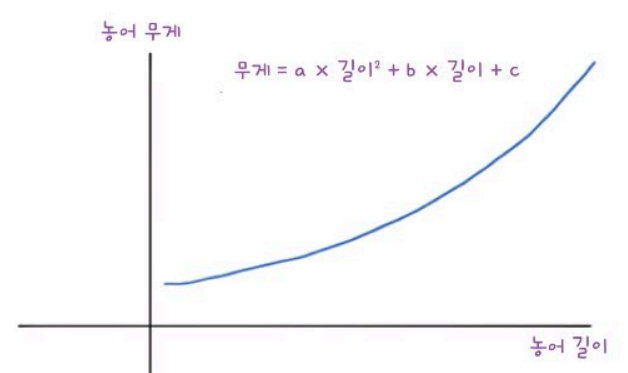

In [21]:
# 길이의 제곱값 이어 붙이기
train_poly = np.column_stack((train_input**2, train_input)) #column_stack 매개변수 튜플로 전달
test_poly = np.column_stack((test_input**2, test_input))

In [22]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [23]:
lr = LinearRegression()

lr.fit(train_poly, train_target) #타깃값은 그대로 사용

#예측
print(lr.predict([[50**2, 50]])) #테스트도 제곱과 원래 길이 함께 넣어주기

[1573.98423528]


In [24]:
#계수, 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


무게 = 1.01 * 길이^2  - 21.6 * 길이 + 116.05

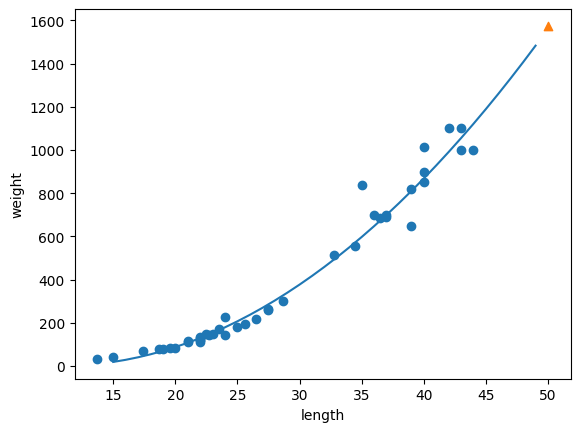

In [25]:
point = np.arange(15, 50) #1씩 끊어서 구간별 직선 그리기

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 -21.6*point + 116.05)

plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
# R^2 점수
print(lr.score(train_poly, train_target)) #형식 맞추기
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


**여전히 테스트 셋의 정확도가 더 높은 과소적합 발생**

-> 여러 특성 데이터 사용하기(길이 + 두께, 높이)

# 다중회귀

여러 특성을 사용한 선형회귀

if 특성 2개 -> 평면 학습

타깃 = a * 특성1 + b * 특성2 + c
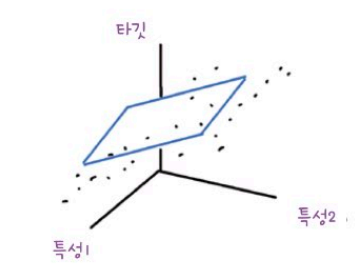

**특성 공학**

기존 특성을 사용하여새로운 특성을 뽑아내는 작업

* 3개의 특성을 제곱하여 추가하는 것 뿐만 아니라 각 특성을 곱해서 새로운 특성을 만들어야 함
* 특성이 늘어날수록 모델 복잡

**데이터 준비**

* 판다스의 데이터 프레임
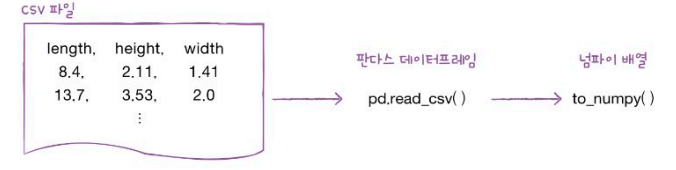

In [28]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [30]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

**새로운 특성 만들기 - 사이킷런의 변환기**

특성을 만들거나 전처리하기 위한 클래스인 변환기 사용
* fit() : 새로운 조합 찾기

ex) ['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2']
* transform() : 값 대입하여 반환
* fit 을 해야 transform 가능

* 1이 특성으로 추가되는 이유
> 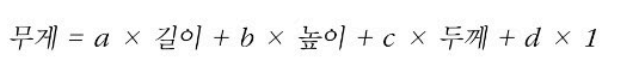
절편 d와 곱해지는 특성으로 인식하기 때문.
사이킷런에서는 필요 없기 때문에 False로 생략 가능

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [32]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [33]:
#train_input 에 적용
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [34]:
#특성 구성 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [35]:
#테스트 세트 변환
test_poly = poly.transform(test_input)

**훈련**

특성이 여러 개인 선형회귀를 수행하는 것이므로 LinearRegression 사용

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target) #a,b,c,d,e,f .. 값 찾기
print(lr.score(train_poly, train_target))

0.9903183436982125


In [37]:
print(lr.score(test_poly, test_target))

0.9714559911594111


**특성 늘린다면**

과대적합 문제 발생

* 훈련세트 거의 완벽하게 수행, 테스트셋에서 잘 작동X

In [38]:
poly = PolynomialFeatures(degree = 5, include_bias = False) #5제곱까지 생성
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [40]:
print(lr.score(test_poly, test_target))

-144.40579436844948


**규제 - 과대적합 줄이기**

특성에 곱해지는 계수(기울기)의 크기 감소 -> 보편적인 패턴 학습
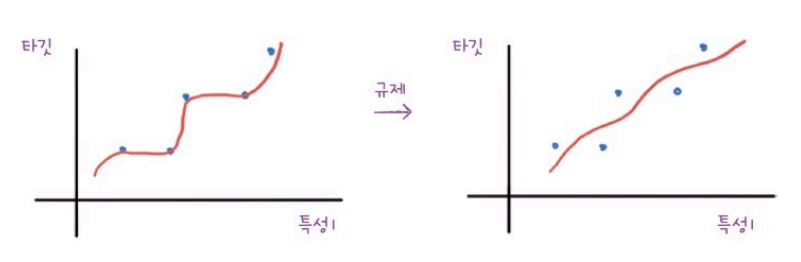
* 각 특성의 스케일이 정규화되어야 계수값의 차이가 줄어들어 공정하게 제어 가능

In [42]:
#정규화
from sklearn.preprocessing import StandardScaler #StandardScaler 변환기
ss = StandardScaler()
ss.fit(train_poly) #55개의 평균과 표준편차 학습
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly) #훈련 셋으로 학습한 변환기로 테스트셋 변환

print(train_scaled)

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]


**릿지 회귀**

계수를 제곱한 값을 기준으로 규제 적용

* alpha 를 하이퍼파라미터로 하여 규제의 정도를 조정

> alpha 크면 규제 강함, 계수 더 줄어듬, 과소적합 유도

> alpha 작은면 규제 약함, 계수 덜 줄어듬, 과대적합 유도

In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [44]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


적절한 alpha 값 찾기

* 훈련, 테스트 정확도 가장 가까운 지점

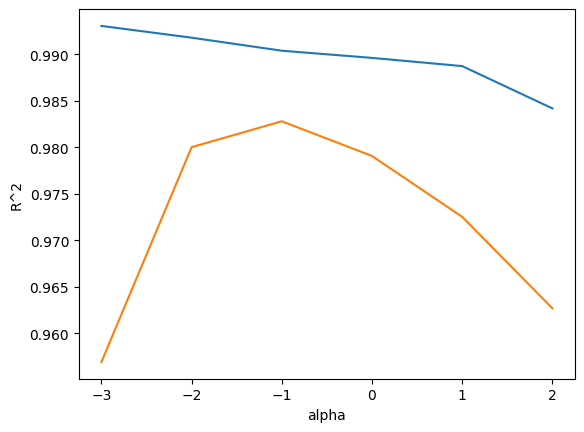

In [45]:
train_score = []
test_score = []
#10배씩 늘린 alpha 리스트 생성
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:

  ridge = Ridge(alpha = alpha)

  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score) # 로그함수로 바꾸어 동일한 간격으로 표현 -3, -2 ,,
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

왼쪽 : 과대적합 , 오른쪽 : 과소적합, 중간 : 적절
-> alpha = 0.1

In [46]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


**라쏘 회귀**

계수의 절댓값을 기준으로 규제 적용

In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


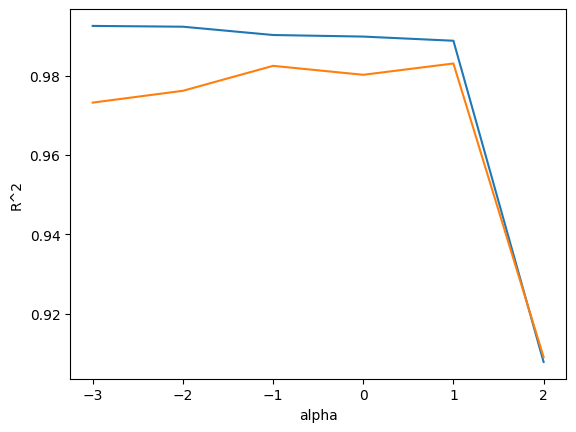

In [48]:
train_score = []
test_score = []
#10배씩 늘린 alpha 리스트 생성
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:

  lasso = Lasso(alpha = alpha, max_iter = 10000)

  lasso.fit(train_scaled, train_target)

  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score) # 로그함수로 바꾸어 동일한 간격으로 표현 -3, -2 ,,
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [49]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


계수를 0 으로 만드는 라쏘 모델

In [50]:
print(np.sum(lasso.coef_ == 0)) #55개의 특성 중 15개의 유용한 특성만 사용

40
